In [6]:

# importing the installed libraries
import re
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
import nltk
import textblob
from collections import Counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from stopwords import get_stopwords





In [7]:
# API keys from Twitter Developer that i registerd with
API_KEY = 'O3IIbcE583A1ag6V0OYeZY5Gn'
API_SECRET = 'QmfMI5X3yebU2TuoaWUGpmFfXqbmYsNfC7AOMC3wJyGyk1BmY8'
ACCESS_TOKEN = '188781750-Pw0qRw8ukWQUTOzEPCO12FG1EopOzrsDE2ObzSEC'
ACCESS_TOKEN_SECRET = '9hNTKaXs95VAPILI3ziOWtHewbVMNrjGE3L5fVtobJ7aG'

In [8]:
# Twitter authentication for the generated keys
auth = tweepy.OAuthHandler(API_KEY, API_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)

In [ ]:
# Defining a query to search for tweets related to "hateful words used during END SARS PROTEST" from major influencers tweets
influencers = ["Aisha Yesufu", "Mr Macaroni", "Sally Suleiman"]
tweets_data = []

for influencer in influencers:
    tweets = tweepy.Cursor(api.search_tweets, q=influencer, lang="en").items(1000)
    for tweets in tweets:
        tweets_data.append([tweet.created_at, tweet.text, influencer])

### AFTER MUCH EFFORT TO EXTRACT DATASET BASED ON THE HATE SPEECH USED DURING END SARS PROTEST IN NIGERIA FOR MY  SENTIMENT ANALYSIS PROVED ABORTIVE DUE TO MY API ACCESS, I HAD TO DOWNLOAD A DATASET FROM KAGGLE TO ACHIEVE THIS PROJECT|

In [11]:
df = pd.read_csv('iphone_data.csv')

In [12]:
df

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
...,...,...,...,...,...,...,...,...,...,...,...
3057,B09G9D8KRQ,India,11-10-2023,True,1,Very bad experience with i phone 13,Useless phon never buy this heat n useless cam...,https://www.amazon.in/gp/customer-reviews/R10O...,Reviewed in India on 11 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3058,B09G9D8KRQ,India,14-10-2022,True,2,not happy with this apple product,iam not happy with this product why because ch...,https://www.amazon.in/gp/customer-reviews/R2FW...,Reviewed in India on 14 October 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3059,B09G9D8KRQ,India,24-02-2022,True,3,Good phone,Good phone,https://www.amazon.in/gp/customer-reviews/R2C7...,Reviewed in India on 24 February 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3060,B09G9D8KRQ,India,16-10-2023,True,1,Battery discharge,While charging mobile it's getting so hot even...,https://www.amazon.in/gp/customer-reviews/R3K0...,Reviewed in India on 16 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N


In [14]:
# definining the entire dataset
def data_summary(df):
    info = df.info()
    description = df.describe()
    
    return info,description

info,description = data_summary(df)
print(info)
print(description)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062 entries, 0 to 3061
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   productAsin        3062 non-null   object
 1   country            3062 non-null   object
 2   date               3062 non-null   object
 3   isVerified         3062 non-null   bool  
 4   ratingScore        3062 non-null   int64 
 5   reviewTitle        3062 non-null   object
 6   reviewDescription  2976 non-null   object
 7   reviewUrl          3046 non-null   object
 8   reviewedIn         3062 non-null   object
 9   variant            3062 non-null   object
 10  variantAsin        3062 non-null   object
dtypes: bool(1), int64(1), object(9)
memory usage: 242.3+ KB
None
       ratingScore
count  3062.000000
mean      3.758981
std       1.579033
min       1.000000
25%       3.000000
50%       5.000000
75%       5.000000
max       5.000000


In [15]:
# creating a function to check null values in he dataset
def null_values(df):
    null = df.isnull()
    sum_of_null_values = null.sum()
    return null,sum_of_null_values

print(null_values(df))

(      productAsin  country   date  isVerified  ratingScore  reviewTitle  \
0           False    False  False       False        False        False   
1           False    False  False       False        False        False   
2           False    False  False       False        False        False   
3           False    False  False       False        False        False   
4           False    False  False       False        False        False   
...           ...      ...    ...         ...          ...          ...   
3057        False    False  False       False        False        False   
3058        False    False  False       False        False        False   
3059        False    False  False       False        False        False   
3060        False    False  False       False        False        False   
3061        False    False  False       False        False        False   

      reviewDescription  reviewUrl  reviewedIn  variant  variantAsin  
0                 False    

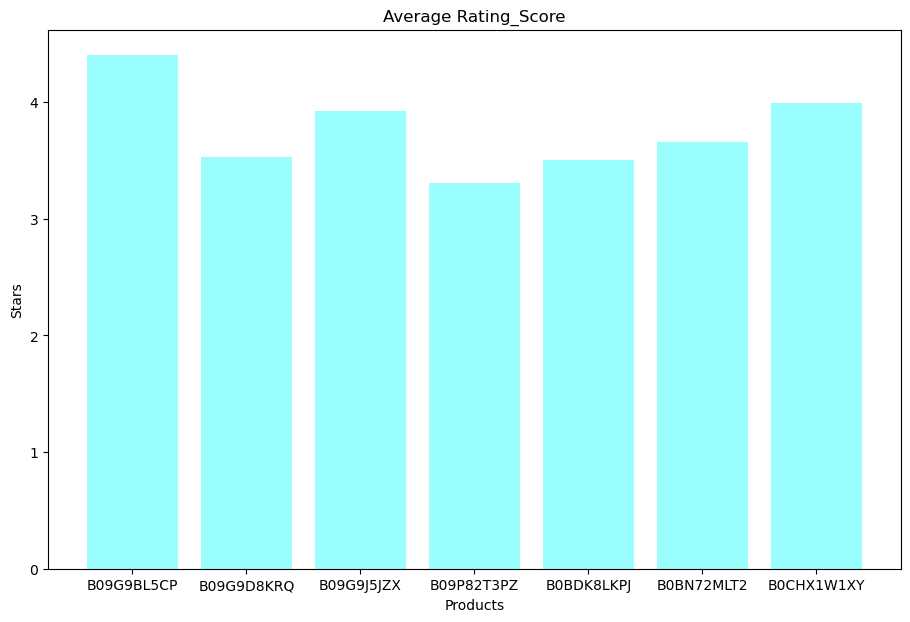

In [34]:
# creating a bar chart visuals to show the average rating scores from the reviews
def bar_chart(df):
    plt.figure(figsize=(11,7 ))
    average_price_by_make = df.groupby('productAsin')['ratingScore'].mean()
    plt.bar(average_price_by_make.index, average_price_by_make.values,color='#9AFEFF')
    plt.title('Average Rating_Score')
    plt.xlabel('Products')
    plt.ylabel('Stars')
    plt.show()
        
bar_chart(df)



c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


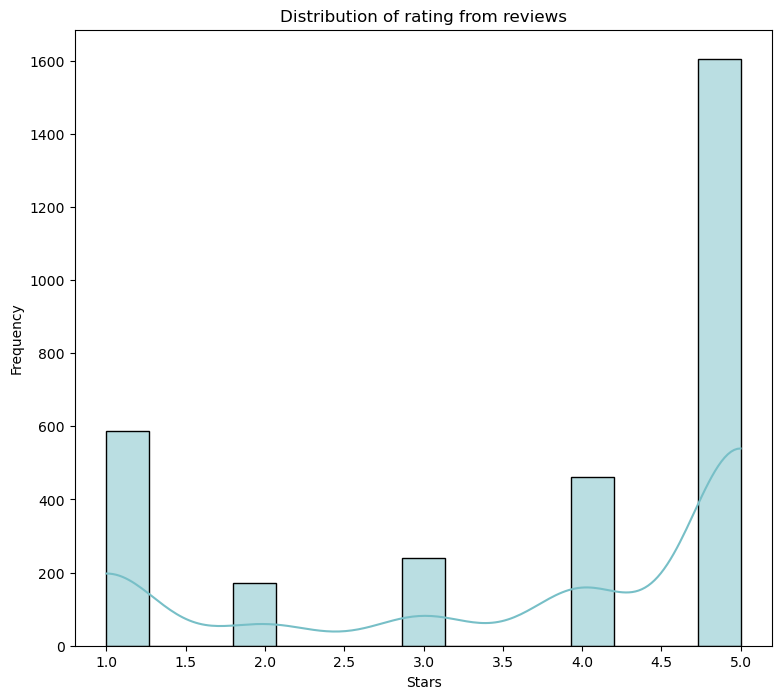

In [35]:
def histplot(df):
    plt.figure(figsize=(9, 8))
    sns.histplot(df['ratingScore'], kde=True, color='#77BFC7')
    plt.title('Distribution of rating from reviews')
    plt.xlabel('Stars')
    plt.ylabel('Frequency')
    plt.show()

histplot(df)

In [39]:
# creating an array of popular stop_words
stop_words = {
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your',
    'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she',
    'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their',
    'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that',
    'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being',
    'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an',
    'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of',
    'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through',
    'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
    'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then',
    'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any',
    'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no',
    'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't',
    'can', 'will', 'just', 'don', 'should', 'now'
}

print(stop_words)


{'then', 'both', 'doing', 'or', 'what', 'why', 'his', 'now', 'more', 'i', 'theirs', 'which', 'against', 'under', 'where', 'any', 'only', 'been', 'be', 'has', 'a', 'don', 'here', 'most', 'whom', 'same', 'who', 'they', 'its', 'do', 'ours', 'herself', 'if', 'he', 'you', 'with', 'out', 'over', 'themselves', 'as', 'these', 'should', 'your', 'we', 'had', 'other', 'yourself', 's', 'about', 'by', 'through', 'to', 't', 'are', 'was', 'again', 'of', 'hers', 'her', 'their', 'my', 'before', 'than', 'above', 'were', 'ourselves', 'she', 'did', 'in', 'no', 'because', 'it', 'for', 'will', 'not', 'further', 'yours', 'once', 'all', 'yourselves', 'being', 'up', 'am', 'himself', 'into', 'nor', 'can', 'myself', 'and', 'when', 'how', 'there', 'very', 'the', 'itself', 'below', 'after', 'while', 'from', 'just', 'own', 'that', 'having', 'off', 'at', 'few', 'me', 'each', 'on', 'until', 'but', 'too', 'some', 'during', 'them', 'this', 'such', 'have', 'between', 'down', 'our', 'an', 'is', 'does', 'so', 'those', 'hi

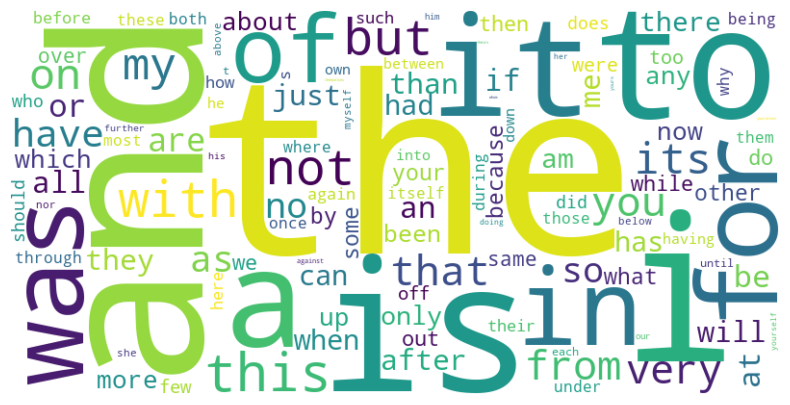

In [46]:
# Combining all reviews into one text
all_reviews = " ".join(str(review) for review in df['reviewDescription'])

# Removing non-alphabetic characters and convert text to lowercase
all_reviews = re.sub(r'[^A-Za-z\s]', '', all_reviews).lower()

# Tokenizing and filtering for stop_words
words = all_reviews.split()
filtered_sentiment_words = [word for word in words if word in stop_words]

# Counting word frequencies
sentiment_word_counts = Counter(filtered_sentiment_words)

# Creating a word cloud from the sentiment words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(sentiment_word_counts)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


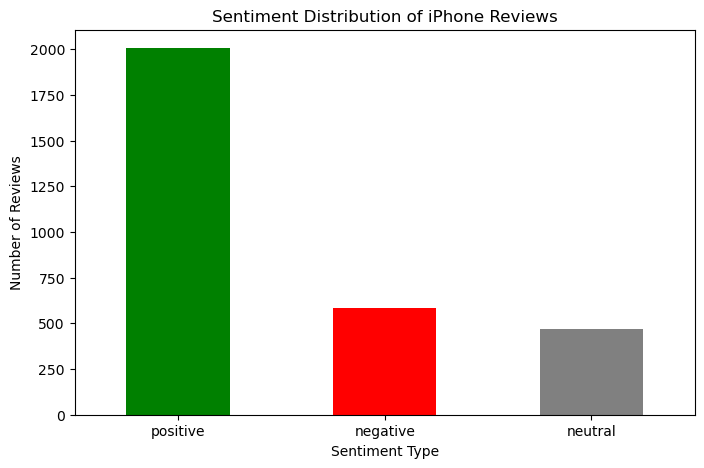

In [54]:
# Initializing the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Defining the sentiment analysis function with handling for non-string values in the reviewdescription column of the dataset
def get_sentiment(review):
    if not isinstance(review, str):  # Check if review is not a string
        review = ""  # Convert non-string reviews to an empty string
    review_cleaned = re.sub(r'[^A-Za-z\s]', '', review).lower()  # Clean text
    score = sia.polarity_scores(review_cleaned)['compound']  # Get compound score
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Applying the function to classify each review
df['sentiment_type'] = df['reviewDescription'].apply(get_sentiment)

# Counting the number of positive, negative, and neutral sentiments in the review column
sentiment_counts = df['sentiment_type'].value_counts()

# Plotting Sentiment Distribution in a Bar Chart
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Sentiment Distribution of iPhone Reviews")
plt.xlabel("Sentiment Type")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.show()